# 11장 - KNN, K-means

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [36]:
# feature 이름 출력
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [37]:
# label: 0=setosa, 1=versicolor, 2=virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [38]:
# 1. KNN
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=6)       # neighbor는 6
knn.fit(X_train, y_train)                       # 모델 훈련

y_pred = knn.predict(X_test)                    # predict
scores = metrics.accuracy_score(y_test, y_pred) # 정확도

print(scores)

0.9666666666666667


[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667]


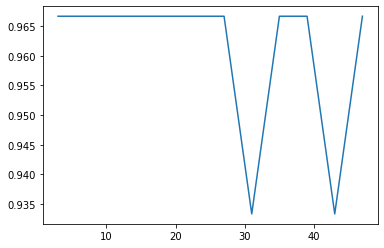

In [40]:
# k값에 따른 accuracy
k_list = []
for i in range(3, 50, 4):   # 3, 7, 11, 15, ..., 47
  k_list.append(i)

score_list = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  scores = metrics.accuracy_score(y_test, y_pred)
  score_list.append(scores)

print(score_list)

import matplotlib.pyplot as plt
plt.plot(k_list, score_list)

[0.975, 0.9833333333333334, 0.975, 0.975, 0.9583333333333333, 0.95, 0.9583333333333334]


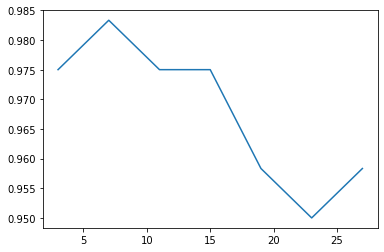

In [41]:
#### k-fold cross validation ####
from sklearn.model_selection import cross_val_score

k_list = []
for i in range(3, 30, 4):
  k_list.append(i)

score_list = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train)
  score_list.append(scores.mean())
print(score_list)


import matplotlib.pyplot as plt
plt.plot(k_list, score_list)

In [42]:
# knn 예측
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 새로운 데이터 입력
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


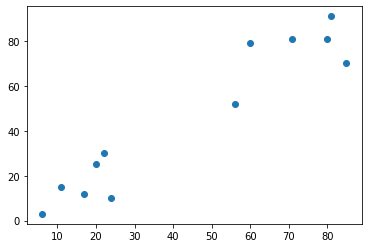

In [43]:
# 2. K-means
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
             [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])
plt.scatter(X[:,0],X[:,1])

In [44]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[72.16666667 75.66666667]
 [16.66666667 15.83333333]]


[1 1 1 1 1 1 0 0 0 0 0 0]


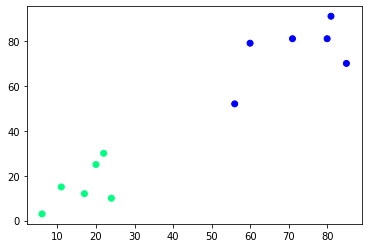

In [45]:
print(kmeans.labels_)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='winter')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_

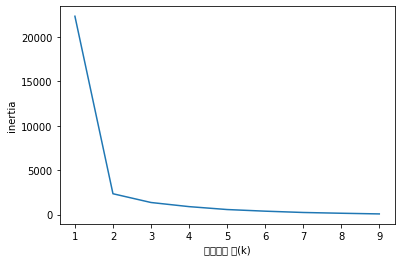

In [49]:
### 엘보우 방법: K-means에서 k값 찾기 ###
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
             [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

inertia = []    # inertia: 군집 간 유사도? 작을수록 좋음
for i in range(1, 10):
  km = KMeans(n_clusters = i)
  inertia.append(km.fit(X).inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('클러스터 수(k)')
plt.ylabel('inertia')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_

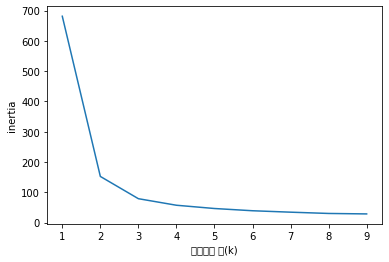

In [50]:
# iris 데이터로 elblow
### 엘보우 방법: K-means에서 k값 찾기 ###
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = load_iris().data

inertia = []    # inertia: 군집 간 유사도? 작을수록 좋음
for i in range(1, 10):
  km = KMeans(n_clusters = i)
  inertia.append(km.fit(X).inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('클러스터 수(k)')
plt.ylabel('inertia')
plt.show()